### Stop Words

In [1]:
from nltk.corpus import stopwords

In [2]:
stop = stopwords.words('english')
stop[:5]

['i', 'me', 'my', 'myself', 'we']

### Zipf's Law

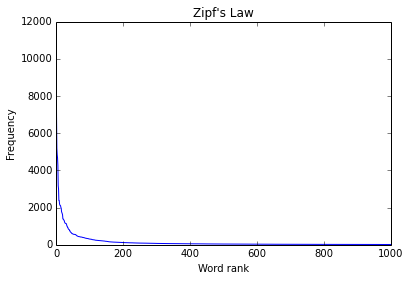

In [21]:
%matplotlib inline
import nltk
import collections
words = nltk.corpus.gutenberg.words('austen-emma.txt')
fd = collections.Counter(words)
data = sorted([fd[k] for k in fd],reverse=True)
import matplotlib.pyplot as plt
plt.plot(data[:1000])
plt.title("Zipf's Law")
plt.xlabel("Word rank")
plt.ylabel("Frequency")

# Vectors and Matrices in Python

### Manipulating Vectors

In [5]:
import numpy as np
a = np.array([1,2,3,4])
a[0]

1

In [6]:
a[1:3]

array([2, 3])

In [7]:
a+1

array([2, 3, 4, 5])

In [8]:
b = np.array([2,3,4,5])
a+b

array([3, 5, 7, 9])

In [9]:
np.dot(a,b)

40

### Manipulating Matrices

In [10]:
x = np.array([[1,2,3],[4,5,6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [12]:
y = np.array([[1,1,1],[2,2,2]])
x+y

array([[2, 3, 4],
       [6, 7, 8]])

In [13]:
x*y

array([[ 1,  2,  3],
       [ 8, 10, 12]])

In [14]:
x.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [15]:
np.dot(x.T,y)

array([[ 9,  9,  9],
       [12, 12, 12],
       [15, 15, 15]])

# Scikit-learn

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import zipfile

In [2]:
import os.path
if not os.path.exists('enron1'):
    with zipfile.ZipFile('enron1.zip') as myzip:
        myzip.extractall()

In [3]:
import glob
files = glob.glob('enron1/ham/*.txt')
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(input='filename',stop_words='english')
tfidf_values = tfidf.fit_transform(files).toarray()
len(tfidf.get_feature_names())


19892

In [4]:
tfidf.get_feature_names()[10000:10005]

['grandma', 'grandpa', 'grandsn', 'grandsons', 'grant']

In [5]:
tfidf_values.shape

(3672, 19892)

In [6]:
len(files)

3672

### Normalised tf.idf and cosine similarity

In [7]:
import numpy as np
tfidf_norm = TfidfVectorizer(input='filename',
                             stop_words='english',
                             norm='l2')
tfidf_norm_values = tfidf_norm.fit_transform(files).toarray()
def cosine_similarity(X,Y):
    return np.dot(X,Y)

In [8]:
cosine_similarity(tfidf_norm_values[0,:],
                  tfidf_norm_values[1,:])

0.017317648885111028

In [9]:
from sklearn.metrics import pairwise
pairwise.cosine_similarity([tfidf_norm_values[0,:]],
                           [tfidf_norm_values[1,:]])

array([[ 0.01731765]])

In [10]:
pairwise.cosine_similarity([tfidf_values[0,:]],
                           [tfidf_values[1,:]])

array([[ 0.01731765]])

### tf.idf versus frequency

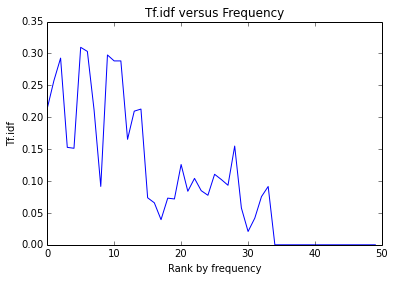

In [11]:
%matplotlib inline
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
files = glob.glob('enron1/ham/*.txt')
tfidf = TfidfVectorizer(input='filename',stop_words='english')
tfidf_array = tfidf.fit_transform(files).toarray()
count = CountVectorizer(input='filename',stop_words='english')
count_array = count.fit_transform(files).toarray()
count_words = count.get_feature_names()
sorted_words = sorted(count_words, 
                      key=lambda x: count_array[0,count_words.index(x)],
                      reverse = True)
tfidf_words = tfidf.get_feature_names()
data_tfidf = [tfidf_array[0,tfidf_words.index(x)] 
              for x in sorted_words]
plt.plot(data_tfidf[:50])
plt.title("Tf.idf versus Frequency")
plt.xlabel("Rank by frequency")
plt.ylabel("Tf.idf")

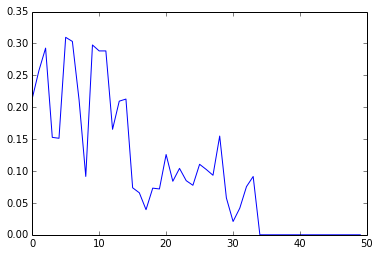

In [20]:
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
files = glob.glob('enron1/ham/*.txt')
tfidf = TfidfVectorizer(input='filename',stop_words='english')
tfidf.fit(files)
tfidf_doc1 = tfidf.transform([files[0]]).toarray()[0,:]
count = CountVectorizer(input='filename',stop_words='english')
count.fit(files)
count_doc1 = count.transform([files[0]]).toarray()[0,:]
count_words = count.get_feature_names()
sorted_words = sorted(count_words, 
                      key=lambda x: count_doc1[count_words.index(x)],
                      reverse = True)
tfidf_words = tfidf.get_feature_names()
data_tfidf = [tfidf_doc1[tfidf_words.index(x)] 
              for x in sorted_words]
plt.plot(data_tfidf[:50])